In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_csv("/content/Dataset.csv")
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [3]:
df.drop(['Switch to order menu'],axis=1,inplace=True)

# Level 3
## Task 1  Restaurant Reviews

### Q1. Analyze the text reviews to identify the most common positive and negative keywords?

In [4]:
df['Rating text'].value_counts()

Rating text
Average      3737
Not rated    2148
Good         2100
Very Good    1079
Excellent     301
Poor          186
Name: count, dtype: int64

In [5]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from textblob import TextBlob
from collections import Counter
import re

In [6]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [7]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [8]:
# Text preprocessing function
def preprocess_text(text):
    # Remove punctuation and numbers
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\d+', '', text)
    # Convert to lowercase
    text = text.lower()
    # Tokenize
    words = word_tokenize(text)
    # Remove stopwords
    words = [word for word in words if word not in stopwords.words('english')]
    return words

In [9]:
# Apply text preprocessing
df['Processed Review Text'] = df['Rating text'].apply(preprocess_text)

# Sentiment analysis function
def get_sentiment(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity

In [10]:
# Apply sentiment analysis
df['Sentiment'] = df['Rating text'].apply(get_sentiment)

# Classify reviews as positive or negative
df['Sentiment Label'] = df['Sentiment'].apply(lambda x: 'positive' if x > 0 else 'negative')

# Extract keywords for positive and negative reviews
positive_reviews = df[df['Sentiment Label'] == 'positive']['Processed Review Text']
negative_reviews = df[df['Sentiment Label'] == 'negative']['Processed Review Text']

positive_keywords = Counter([word for review in positive_reviews for word in review])
negative_keywords = Counter([word for review in negative_reviews for word in review])

# Get the most common keywords
most_common_positive = positive_keywords.most_common(10)
most_common_negative = negative_keywords.most_common(10)

print("Most common positive keywords:")
print(most_common_positive)

print("\nMost common negative keywords:")
print(most_common_negative)

Most common positive keywords:
[('good', 3179), ('excellent', 301)]

Most common negative keywords:
[('average', 3737), ('rated', 2148), ('poor', 186)]


### Q2. Calculate the average length of reviews and explore if there is a relationship between review length and rating?

In [11]:
# Calculate the length of each review (number of characters)
df['Review Length'] = df['Rating text'].apply(len)

# Calculate the average review length
average_review_length = df['Review Length'].mean()
print(f"The average length of reviews is: {average_review_length:.2f} characters")

The average length of reviews is: 7.02 characters


In [12]:
# Explore the relationship between review length and rating
# Calculate the correlation between review length and rating
correlation = df['Review Length'].corr(df['Aggregate rating'])
print(f"The correlation between review length and rating is: {correlation:.2f}")

The correlation between review length and rating is: -0.48


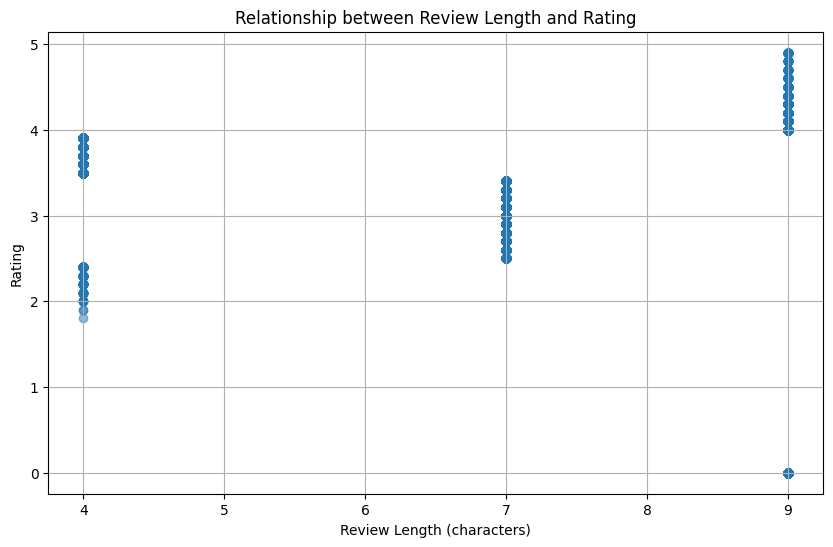

In [13]:
# Visualize the relationship using a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df['Review Length'], df['Aggregate rating'], alpha=0.5)
plt.title('Relationship between Review Length and Rating')
plt.xlabel('Review Length (characters)')
plt.ylabel('Rating')
plt.grid(True)
plt.show()

# Level 3
## Task 2  Votes Analysis

### Q1. Identify the restaurants with the highest and lowest number of votes?

In [14]:
# Drop rows where 'Votes' is NaN
df = df.dropna(subset=['Votes'])

# Convert 'Votes' to integer if it's not already
df['Votes'] = df['Votes'].astype(int)

In [15]:
# Identify the restaurant with the highest number of votes
max_votes_row = df.loc[df['Votes'].idxmax()]
max_votes_restaurant = max_votes_row[['Restaurant Name', 'Votes']]
print("Restaurant with the highest number of votes:")
print(max_votes_restaurant)

Restaurant with the highest number of votes:
Restaurant Name     Toit
Votes              10934
Name: 728, dtype: object


In [16]:
# Identify the restaurant with the lowest number of votes
min_votes_row = df.loc[df['Votes'].idxmin()]
min_votes_restaurant = min_votes_row[['Restaurant Name', 'Votes']]
print("\nRestaurant with the lowest number of votes:")
print(min_votes_restaurant)


Restaurant with the lowest number of votes:
Restaurant Name    Cantinho da Gula
Votes                             0
Name: 69, dtype: object


### Q2. Analyze if there is a correlation between the number of votes and the rating of a restaurant?

In [17]:
# Calculate the Pearson correlation coefficient
correlation = df['Votes'].corr(df['Aggregate rating'])
print(f"The correlation coefficient between votes and rating is: {correlation:.2f}")

The correlation coefficient between votes and rating is: 0.31


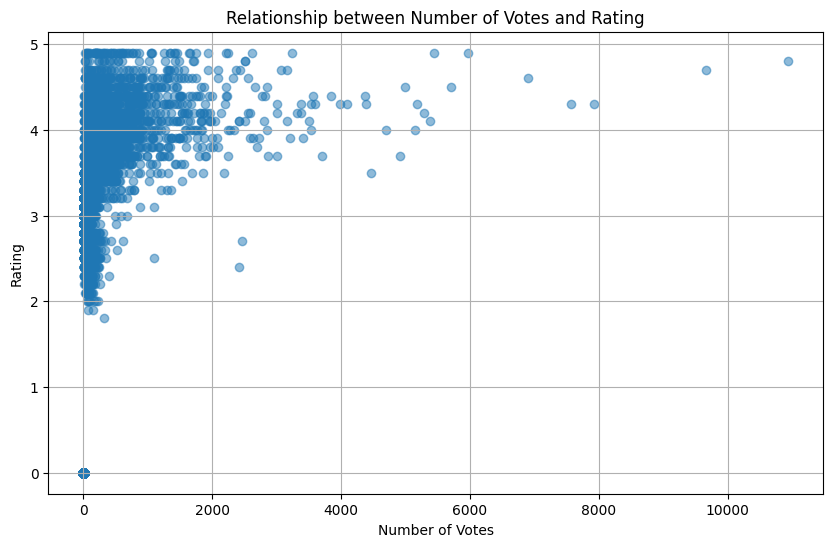

In [18]:
# Visualize the relationship using a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df['Votes'], df['Aggregate rating'], alpha=0.5)
plt.title('Relationship between Number of Votes and Rating')
plt.xlabel('Number of Votes')
plt.ylabel('Rating')
plt.grid(True)
plt.show()

# Level 3
## Task 3       Price Range vs. Online Delivery and Table Booking

### Q1. Analyze if there is a relationship between the price range and the availability of online delivery and table booking?

In [19]:
# Convert 'Has Online delivery' and 'Has Table booking' to binary (0 or 1)
df['Has Online delivery'] = df['Has Online delivery'].apply(lambda x: 1 if x == 'Yes' else 0)
df['Has Table booking'] = df['Has Table booking'].apply(lambda x: 1 if x == 'Yes' else 0)

In [20]:
# Group by 'Price range' and calculate the mean for 'Has Online delivery' and 'Has Table booking'
summary = df.groupby('Price range').agg({
    'Has Online delivery': 'mean',
    'Has Table booking': 'mean'
}).reset_index()

In [21]:
# Convert the mean values to percentages
summary['Has Online delivery'] = summary['Has Online delivery'] * 100
summary['Has Table booking'] = summary['Has Table booking'] * 100

# Print the summary
print(summary)

   Price range  Has Online delivery  Has Table booking
0            1            15.774077           0.022502
1            2            41.310633           7.677482
2            3            29.190341          45.738636
3            4             9.044369          46.757679


Text(0, 0.5, 'Percentage of Restaurants with Online Delivery')

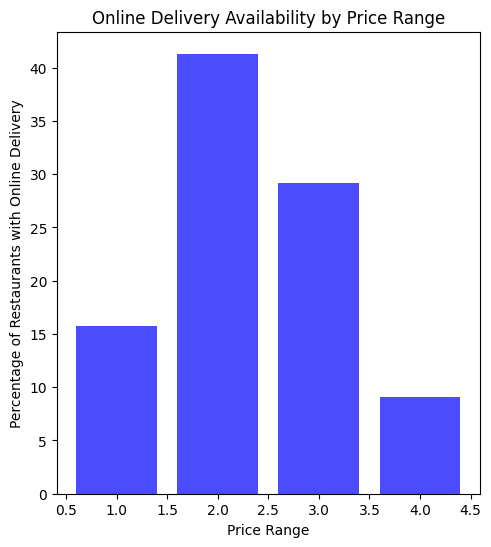

In [22]:
# Visualize the results using bar plots
plt.figure(figsize=(12, 6))

# Plot for Online Delivery
plt.subplot(1, 2, 1)
plt.bar(summary['Price range'], summary['Has Online delivery'], color='blue', alpha=0.7)
plt.title('Online Delivery Availability by Price Range')
plt.xlabel('Price Range')
plt.ylabel('Percentage of Restaurants with Online Delivery')

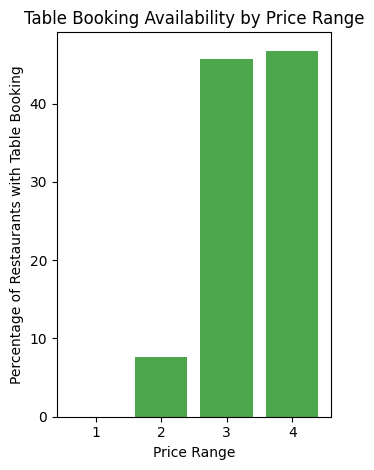

In [23]:
# Plot for Table Booking
plt.subplot(1, 2, 2)
plt.bar(summary['Price range'], summary['Has Table booking'], color='green', alpha=0.7)
plt.title('Table Booking Availability by Price Range')
plt.xlabel('Price Range')
plt.ylabel('Percentage of Restaurants with Table Booking')

plt.tight_layout()
plt.show()

### Q2. Determine if higher-priced restaurants are more likely to offer these services?

In [24]:
import scipy.stats as stats

# Create contingency tables for chi-square test
contingency_online_delivery = pd.crosstab(df['Price range'], df['Has Online delivery'])
contingency_table_booking = pd.crosstab(df['Price range'], df['Has Table booking'])

In [25]:
# Perform chi-square test for online delivery
chi2_online_delivery, p_online_delivery, _, _ = stats.chi2_contingency(contingency_online_delivery)
print(f"Chi-Square Test for Online Delivery:\nChi2 Statistic: {chi2_online_delivery}\nP-value: {p_online_delivery}")

Chi-Square Test for Online Delivery:
Chi2 Statistic: 721.3786767489615
P-value: 4.855491091732406e-156


In [26]:
# Perform chi-square test for table booking
chi2_table_booking, p_table_booking, _, _ = stats.chi2_contingency(contingency_table_booking)
print(f"\nChi-Square Test for Table Booking:\nChi2 Statistic: {chi2_table_booking}\nP-value: {p_table_booking}")


Chi-Square Test for Table Booking:
Chi2 Statistic: 2821.5808929580135
P-value: 0.0


In [27]:
# Interpret the results
alpha = 0.05
if p_online_delivery < alpha:
    print("\nThere is a significant relationship between price range and online delivery availability.")
else:
    print("\nThere is no significant relationship between price range and online delivery availability.")


There is a significant relationship between price range and online delivery availability.


In [28]:
if p_table_booking < alpha:
    print("There is a significant relationship between price range and table booking availability.")
else:
    print("There is no significant relationship between price range and table booking availability.")

There is a significant relationship between price range and table booking availability.
